In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd
from pandas import DataFrame,Series
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from random import sample

In [6]:
multi_layer_dup_train = pd.read_csv('../FeaturesCsvFile/featuresfile.csv')
multi_layer_dup_test = pd.read_csv('../FeaturesCsvFile/featuresfile_10.csv')
multi_layer_train = multi_layer_dup_train.drop_duplicates(subset=['User', 'Timestamp'])
multi_layer_unique_test = multi_layer_dup_test.drop_duplicates(subset=['User', 'Timestamp'])
multi_layer_test = multi_layer_unique_test.iloc[sample(range(len(multi_layer_unique_test)), 40), :]

print ('(#row,#column) of train dataset' , multi_layer_train.shape)
print ('(#row,#column) of test dataset' , multi_layer_test.shape)

('(#row,#column) of train dataset', (406, 46))
('(#row,#column) of test dataset', (40, 46))


In [7]:
X_train = multi_layer_train.values[:, 2:45]
y_train = multi_layer_train.values[:, 45]
X_test = multi_layer_test.values[:, 2:45]
y_test = multi_layer_test.values[:, 45]

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [94]:
mlp = MLPClassifier(hidden_layer_sizes=(15,),max_iter=60)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('\nAccuracy of Multi-layer Perceptron Score: %.2f' % mlp.score(X_test,y_test))
print('\nAccuracy of Accuracy Score : %.2f' % accuracy_score(y_test,y_pred))

[[16  4]
 [ 4 16]]
             precision    recall  f1-score   support

    running       0.80      0.80      0.80        20
    walking       0.80      0.80      0.80        20

avg / total       0.80      0.80      0.80        40


Accuracy of Multi-layer Perceptron Score: 0.80

Accuracy of Accuracy Score : 0.80


In [95]:
for i in range(0,len(mlp.coefs_[0])):
    print mlp.coefs_[0][i]

[ 0.12235787  0.12789495 -0.02793496 -0.09468049  0.34952045  0.06809124
  0.15163515 -0.07829524  0.02340041 -0.23713252 -0.07132879  0.09612821
  0.26811775 -0.15395614  0.24343125]
[ 0.23535623 -0.09516874  0.00616424  0.06468685 -0.12496201 -0.05622185
  0.04855544  0.23379815 -0.09867524 -0.34023587  0.14924501  0.26556911
  0.04464728  0.27203709  0.217442  ]
[ 0.08613421 -0.12794671  0.19947432 -0.02344498 -0.01234894 -0.27173422
 -0.13101981 -0.10407447 -0.34683198  0.11086818  0.11289683  0.08894067
 -0.05136253  0.26465481  0.15672459]
[ 0.09038637 -0.05976515  0.26870887 -0.07331945  0.2305423  -0.2029732
  0.16132778  0.19267097 -0.06862219  0.1094099   0.27893252  0.26928647
 -0.13475411 -0.12132286 -0.05132219]
[ 0.2421778  -0.37254126  0.04663032  0.26080324  0.14057909 -0.12460854
 -0.29030414  0.00129776 -0.28475944  0.3387149   0.32483152 -0.01635943
 -0.13357928  0.17629125  0.06750578]
[-0.15751626  0.06736764 -0.03354816  0.15141176  0.07059152  0.16756554
 -0.4228

In [96]:
avg_weight = []
for i in range(0,len(mlp.coefs_[0])):
    avg_weight.append(np.mean(mlp.coefs_[0][i]))
print ('Important features (featureName, weigh of important, #column)')
header = list(multi_layer_train.head(1))
important_feature = []
for i in range(0,len(avg_weight)):
     important_feature.append((header[i+2],avg_weight[i],i+2))
sorted_list = sorted(important_feature,key=lambda important_feature: important_feature[1],reverse=True)
for j in range(0,len(sorted_list)):
        first_imp_fea = sorted_list[0]
        second_imp_fea = sorted_list[1]
        print sorted_list[j]

Important features (featureName, weigh of important, #column)
('Bin6,z', 0.094601177728624003, 27)
('Bin8,z', 0.094514202079460652, 29)
('StdDev-y', 0.088663715958824732, 42)
('Bin1,y', 0.073314365660696462, 12)
('StdDev-x', 0.059735718431789854, 41)
('Bin4,x', 0.059279068690570556, 5)
('AvgAcc-x', 0.057088874101446675, 38)
('Bin2,x', 0.054815846231073953, 3)
('Bin1,x', 0.052483275917243243, 2)
('TimeDiffPeaks-z', 0.036760004018860752, 34)
('Bin7,x', 0.030140836529262457, 8)
('TimeDiffPeaks-y', 0.030045072478452919, 33)
('AvgResAcc', 0.030028617199406204, 44)
('Bin10,y', 0.027736726851836167, 21)
('Bin5,y', 0.027575073810641903, 16)
('Bin6,x', 0.02719740608378847, 7)
('Bin5,x', 0.025111970747539125, 6)
('Bin6,y', 0.023000524959408113, 17)
('Bin3,y', 0.019998883447374483, 14)
('TimeDiffPeaks-x', 0.017952269665951284, 32)
('Bin4,y', 0.014992725496758603, 15)
('AvgAcc-y', 0.012952242472802076, 39)
('Bin9,z', 0.0063358977150004426, 30)
('Bin3,z', 0.003926208116920368, 24)
('Bin2,z', 0.0011

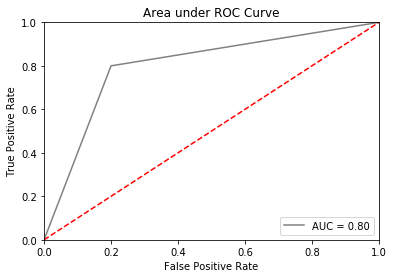

In [106]:
from sklearn import metrics
def plot_roc_curve(Y_predict,Y_test,name_graph):
    num_predns = []
    for i in range(0,len(Y_predict)):
        if Y_predict[i] == "walking":
            num_predns.append(0)
        else:
            num_predns.append(1)
    num_labels = []
    for i in range(0,len(Y_test)):
        if Y_test[i] == "walking":
            num_labels.append(0)
        else:
            num_labels.append(1)

    predns = np.array(num_predns)
    labels = np.array(num_labels)
    fpr, tpr, thresholds = metrics.roc_curve(labels, predns)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Area under ROC Curve')
    plt.plot(fpr, tpr, 'grey', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
#     plt.savefig('./image/Area_under_roc_pc.png', dpi=1000)
    
plot_roc_curve(y_pred,y_test,"Area_under_roc_pc")